# 모델링
---

In [3]:
## 라이브러리 로드
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 경고 메세지 삭제
import warnings
warnings.filterwarnings('ignore')

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# pd.set_option('display.max_rows', None)

In [4]:
# 모델 import
from sklearn.metrics import accuracy_score, recall_score, precision_score , f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score,roc_auc_score, mean_squared_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

import warnings 
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv('../datasets/Stan_RAW.csv', index_col=0)

In [27]:
df

,국적,전국스크린수,전국관객수,개봉연도,국내배급사,상장배급사,개봉일관객수,개봉일매출비율,타겟,배우가중치,감독가중치,0,1,2,3
0,1.0,1587,17613682,2014,0.0,1.0,682701.0,61.6,0,39.000000,2.000000,0,1,0,0
1,1.0,1978,16264944,2019,0.0,1.0,368582.0,73.2,1,21.000000,3.000000,0,1,0,0
2,1.0,1912,14410754,2017,0.0,1.0,406365.0,63.2,0,27.000000,3.000000,0,0,1,0
3,1.0,966,14245998,2014,0.0,1.0,184756.0,31.0,0,29.000000,1.000000,0,0,1,0
4,0.0,2835,13934592,2019,1.0,0.0,1338729.0,97.1,0,22.000000,3.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,0.0,425,260721,2015,1.0,0.0,18404.0,5.6,1,0.333333,0.100000,0,0,1,0
910,1.0,445,257716,2015,0.0,0.0,32277.0,13.1,0,0.633333,0.033333,1,0,0,0
911,0.0,168,257193,2011,1.0,0.0,12613.0,7.5,1,0.033333,0.066667,1,0,0,0
912,0.0,401,256475,2015,1.0,0.0,26707.0,5.8,1,0.233333,0.033333,0,1,0,0


In [19]:
# 무한값, 결측치 0으로 대체
df.replace([np.nan, np.inf, -np.inf], 0, inplace=True)

In [28]:
# 선정된 피쳐만 남기기
df = df[['개봉연도', '전국관객수', '개봉일관객수', '전국스크린수', '배우가중치', '국내배급사', '2', '국적', '0', '3', '타겟']]

In [25]:
df.head()

,전국관객수,개봉일관객수,전국스크린수,배우가중치,국내배급사,2,국적,0,3,타겟
0,17613682,682701.0,1587,39.0,0.0,0,1.0,0,0,0
1,16264944,368582.0,1978,21.0,0.0,0,1.0,0,0,1
2,14410754,406365.0,1912,27.0,0.0,1,1.0,0,0,0
3,14245998,184756.0,966,29.0,0.0,1,1.0,0,0,0
4,13934592,1338729.0,2835,22.0,1.0,1,0.0,0,0,0


In [29]:
# 스케일링 하지 않을 피쳐와 개봉연도 남기기
df2 = df[['2', '3', '0', '국적']]
df2['개봉연도1'] = df['개봉연도']
df.drop(columns=['2', '3', '0', '국적'], axis=1, inplace=True)

In [31]:
# 남길 피쳐들 연도로 나누기
df2_train = df2[df2['개봉연도1'] < 2018]
df2_test = df2[df2['개봉연도1'] >= 2018]

In [32]:
df2_train.reset_index(drop=True, inplace=True)
df2_test.reset_index(drop=True, inplace=True)

In [33]:
df_train = df[df['개봉연도'] < 2018]

In [34]:
df_test = df[df['개봉연도'] >= 2018]

In [35]:
X_train = df_train.drop(columns=['타겟'], axis=1)
y_train = df_train['타겟']

X_test = df_test.drop(columns=['타겟'], axis=1)
y_test = df_test['타겟']

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(749, 6) (749,)
(165, 6) (165,)


In [37]:
## Standard Train셋 스케일링
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)
data_scaled_stan = scaler_stan.transform(X_train)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_train_stan = pd.DataFrame(data = data_scaled_stan, columns=X_train.columns)

In [38]:
## Standard Train셋 스케일링
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler_stan = StandardScaler()
scaler_stan.fit(X_train)
data_scaled_stan = scaler_stan.transform(X_test)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
X_test_stan = pd.DataFrame(data = data_scaled_stan, columns=X_test.columns)

In [41]:
X_train_stan = pd.concat([X_train_stan, df2_train],axis=1)
X_test_stan = pd.concat([X_test_stan, df2_test],axis=1)

## 파라미터 조정 전

In [43]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier(),
    XGBClassifier(),
]


rdict={'model':[],'acc_train':[], 'precision_train':[], 'recall_train':[], 'f1_score_train':[],  'AUC_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}


for clf in models:
    clf = clf.fit(X_train_stan, y_train)
#1열:Test
    y_hat = clf.predict(X_train_stan)
    results_train  = (round(accuracy_score(y_train,y_hat),2)
                      ,round(precision_score(y_train,y_hat),2)
                      ,round(recall_score(y_train,y_hat),2)
                      ,round(f1_score(y_train,y_hat),2)
                      ,round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test_stan)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_test'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.57, 0.56, 0.75, 0.64, 0.56) (0.48, 0.41, 0.46, 0.43, 0.48)
(0.72, 0.72, 0.74, 0.73, 0.71) (0.49, 0.44, 0.68, 0.53, 0.51)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.55, 0.48, 0.54, 0.51, 0.55)
(0.52, 0.52, 1.0, 0.68, 0.5) (0.43, 0.43, 1.0, 0.6, 0.5)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.53, 0.46, 0.56, 0.51, 0.53)
(1.0, 1.0, 1.0, 1.0, 1.0) (0.51, 0.44, 0.52, 0.48, 0.51)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc_test,precision,recall,f1_score,AUC_test
0,LogisticRegression(),0.57,0.56,0.75,0.64,0.56,0.48,0.41,0.46,0.43,0.48
1,KNeighborsClassifier(),0.72,0.72,0.74,0.73,0.71,0.49,0.44,0.68,0.53,0.51
2,DecisionTreeClassifier(),1.00,1.00,1.00,1.00,1.00,0.55,0.48,0.54,0.51,0.55
3,SVC(),0.52,0.52,1.00,0.68,0.50,0.43,0.43,1.00,0.60,0.50
4,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,1.00,1.00,1.00,0.53,0.46,0.56,0.51,0.53
5,"XGBClassifier(base_score=None, booster=None, c...",1.00,1.00,1.00,1.00,1.00,0.51,0.44,0.52,0.48,0.51


## 파라미터 조정 후

In [46]:
models = [
    LogisticRegression(C=5, penalty='l2', solver='lbfgs', max_iter=200, multi_class='auto'),
    DecisionTreeClassifier(criterion='gini', max_depth=9, max_features='sqrt', min_samples_leaf=1, min_samples_split=16, splitter='best'),
    RandomForestClassifier(criterion='log_loss', max_depth=12, max_features='log2', max_leaf_nodes=9, n_estimators=25),
    XGBClassifier(random_state=1, min_child_weight=1, gamma=2, subsample=1, colsample_bytree=1, max_depth=6, learning_rate=0.15),
]


rdict={'model':[],'acc_train':[], 'precision_train':[], 'recall_train':[], 'f1_score_train':[],  'AUC_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'AUC_test':[]}


for clf in models:
    clf = clf.fit(X_train_stan, y_train)
#1열:Test
    y_hat = clf.predict(X_train_stan)
    results_train  = (round(accuracy_score(y_train,y_hat),2)
                      ,round(precision_score(y_train,y_hat),2)
                      ,round(recall_score(y_train,y_hat),2)
                      ,round(f1_score(y_train,y_hat),2)
                      ,round(roc_auc_score(y_train,y_hat),2))
#2열:Val
    y_hat = clf.predict(X_test_stan)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat),2),
                    round(recall_score(y_test,y_hat),2),
                    round(f1_score(y_test,y_hat),2),
                    round(roc_auc_score(y_test,y_hat),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0])
    rdict['precision_train'].append(results_train[1])
    rdict['recall_train'].append(results_train[2])
    rdict['f1_score_train'].append(results_train[3])
    rdict['AUC_train'].append(results_train[4])
    
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['AUC_test'].append(results[4])   

    print(results_train, results)

rdf3 = pd.DataFrame(data=rdict)
rdf3

(0.56, 0.56, 0.73, 0.64, 0.56) (0.48, 0.41, 0.51, 0.46, 0.48)
(0.71, 0.7, 0.77, 0.73, 0.7) (0.48, 0.44, 0.75, 0.55, 0.51)
(0.67, 0.65, 0.77, 0.71, 0.66) (0.47, 0.42, 0.63, 0.51, 0.49)
(0.89, 0.9, 0.88, 0.89, 0.89) (0.5, 0.44, 0.59, 0.51, 0.51)


,model,acc_train,precision_train,recall_train,f1_score_train,AUC_train,acc_test,precision,recall,f1_score,AUC_test
0,"LogisticRegression(C=5, max_iter=200)",0.56,0.56,0.73,0.64,0.56,0.48,0.41,0.51,0.46,0.48
1,"DecisionTreeClassifier(max_depth=9, max_featur...",0.71,0.70,0.77,0.73,0.70,0.48,0.44,0.75,0.55,0.51
2,"(DecisionTreeClassifier(criterion='log_loss', ...",0.67,0.65,0.77,0.71,0.66,0.47,0.42,0.63,0.51,0.49
3,"XGBClassifier(base_score=None, booster=None, c...",0.89,0.90,0.88,0.89,0.89,0.50,0.44,0.59,0.51,0.51


In [49]:
model_XGB = XGBClassifier(random_state=1, min_child_weight=1, gamma=2, subsample=1, colsample_bytree=1, max_depth=6, learning_rate=0.15)
model_XGB.fit(X_train_stan, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=2, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=1, ...)

## Shapely value

In [ ]:
import shap

shap.initjs()
explainer = shap.TreeExplainer(model_XGB)
shap_values = explainer.shap_values(X_train)
shap.force_plot(explainer.expected_value, shap_values[0, :], X_train.iloc[0, :])

In [29]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

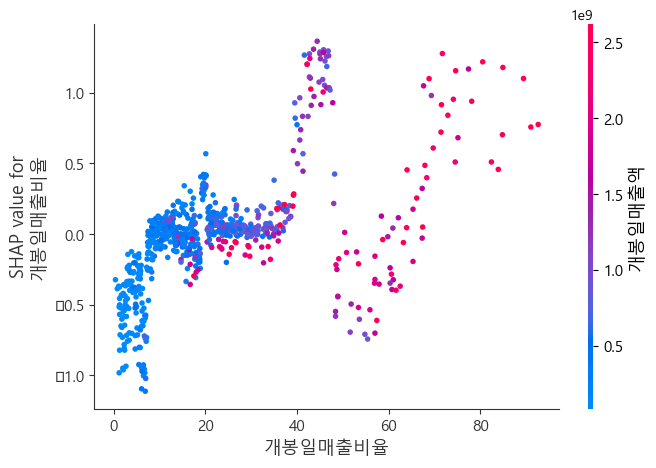

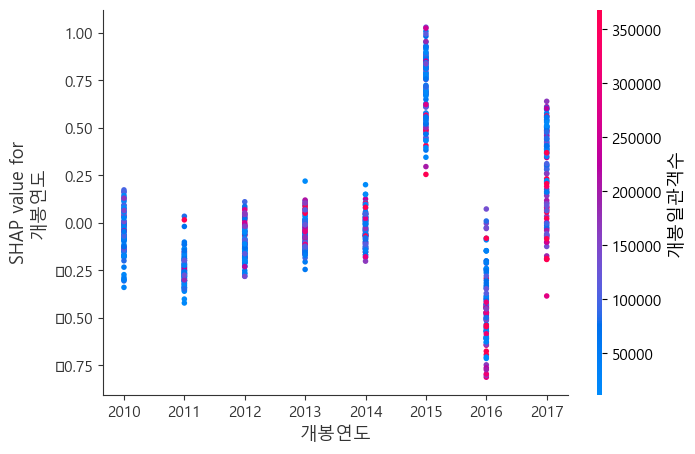

In [30]:
shap.initjs()
# 총 13개 특성의 Shapley value를 절댓값 변환 후 각 특성마다 더함 -> np.argsort()는 작은 순서대로 정렬, 큰 순서대로 정렬하려면
# 앞에 마이너스(-) 기호를 붙임
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# 영향력 top 2 컬럼
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, X_train)

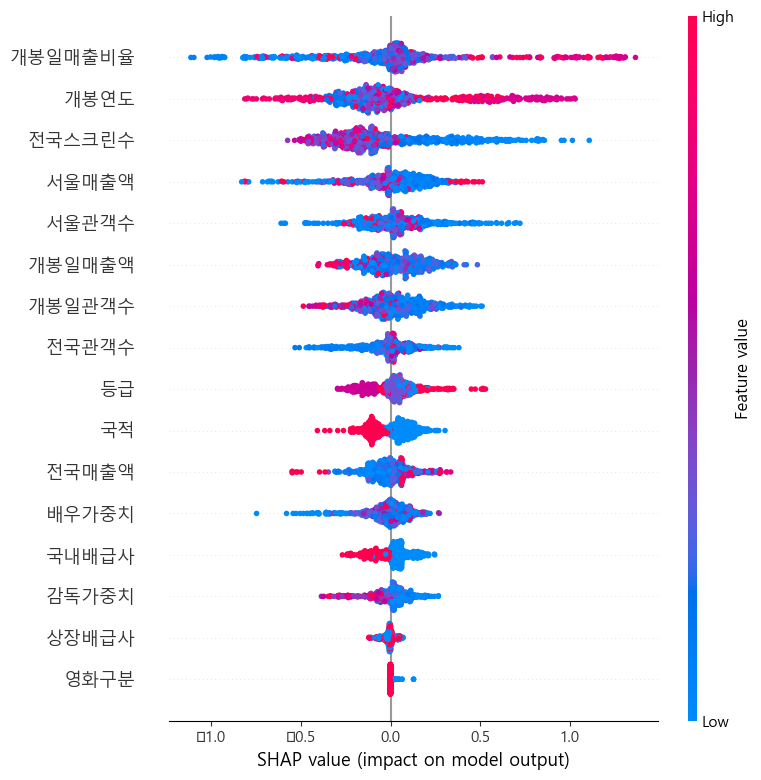

In [31]:
shap.summary_plot(shap_values, X_train)

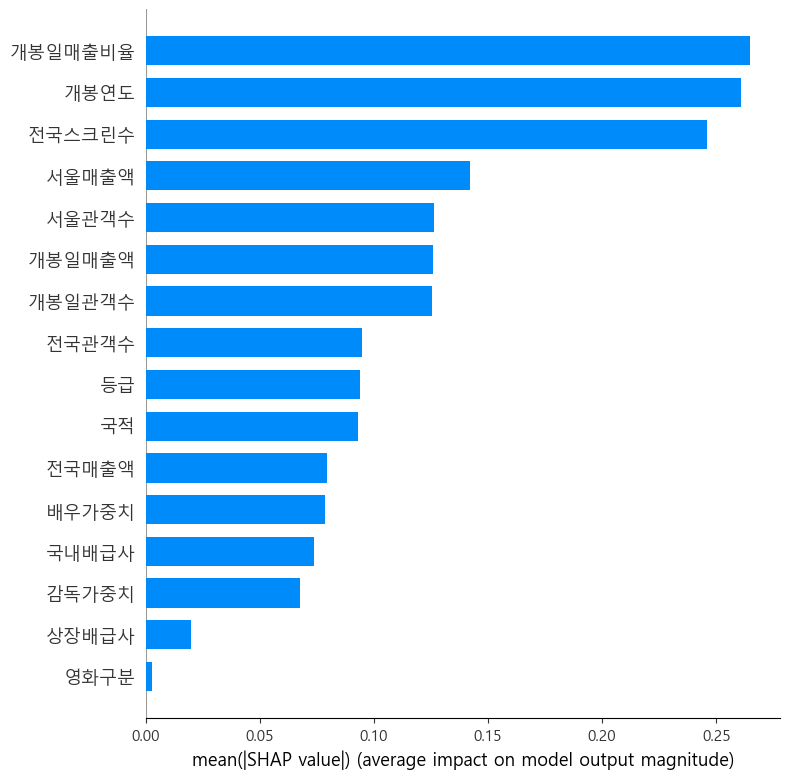

In [32]:
shap.summary_plot(shap_values, X_train, plot_type='bar')